<a href="https://colab.research.google.com/github/MrRezamo/Analysis_Credit_Score_Classification/blob/master/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

print("Ok")

Ok


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/sample_data/Credit Score Classification/Credit-Score-Data/Credit Score Data/train.csv')

In [4]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
print(f"There are {data.shape[1]} Columns ")
print(f"There are {data.shape[0]} Rows ")

There are 28 Columns 
There are 100000 Rows 


In [11]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 1])

Series([], dtype: int64)


In [12]:
nan_values = data.isna().sum()
print(nan_values[nan_values > 1])

Series([], dtype: int64)


In [17]:
print(f"There are {data.duplicated().sum()} Duplicated values")

There are 0 Duplicated values


In [18]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [22]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [24]:
numerical_columns = []
categorical_columns  = []

for col in data.columns:
  if data[col].dtype == 'object':
    categorical_columns.append(col)
  else:
    numerical_columns.append(col)

print(f"numirical columns {len(numerical_columns)} : {numerical_columns}")
print(f"catorical columns {len(categorical_columns)} : {categorical_columns}")

numirical columns 21 : ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
catorical columns 7 : ['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [25]:
numirical_columns : data[['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
                         'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
                         'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                         'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
                         'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']]

catorical_columns : data[['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']]

In [26]:
cat_df = pd.DataFrame(data[categorical_columns])
cat_df.head()

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Small_value_payments,Good
1,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good


In [27]:
num_df = pd.DataFrame(data[numerical_columns])
num_df.head()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,5634,3392,1,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,312.494089
1,5635,3392,2,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,284.629162
2,5636,3392,3,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,331.209863
3,5637,3392,4,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,223.451310
4,5638,3392,5,23.0,821000265.0,19114.12,1824.843333,3.0,4.0,3.0,...,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,341.489231


In [35]:
print(f"Unique values in Credit Score : {data['Credit_Score'].unique()}")
print(data['Credit_Score'].value_counts())

Unique values in Credit Score : ['Good' 'Standard' 'Poor']
Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


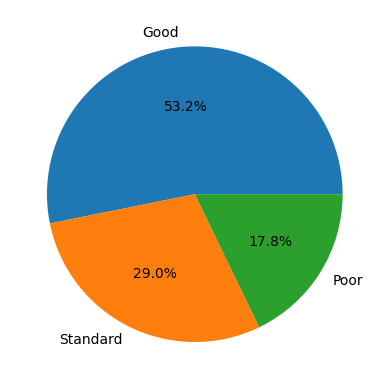

In [36]:
plt.pie(data['Credit_Score'].value_counts(), labels=data['Credit_Score'].unique(), autopct='%1.1f%%')
plt.show()

In [41]:
print(data['Payment_Behaviour'].unique())
print('\n')
data['Payment_Behaviour'].value_counts()

['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']




Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64

In [44]:
print(data['Credit_Mix'].unique())
print('\n')
data['Credit_Mix'].value_counts()

['Good' 'Standard' 'Bad']




Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

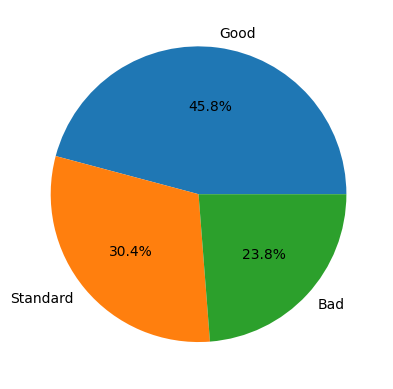

In [43]:
plt.pie(data['Credit_Mix'].value_counts(), labels=data['Credit_Mix'].unique(), autopct='%1.1f%%')
plt.show()

In [45]:
print(data['Payment_of_Min_Amount'].unique())
print('\n')
data['Payment_of_Min_Amount'].value_counts()

['No' 'NM' 'Yes']




Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

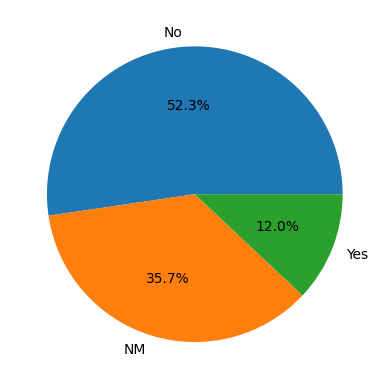

In [47]:
plt.pie(data['Payment_of_Min_Amount'].value_counts(), labels=data['Payment_of_Min_Amount'].unique(), autopct='%1.1f%%')
plt.show()